In [6]:
!pmg config --add PMG_MAPI_KEY WESqkrhIzuQO30MN

Existing /home/max/.pmgrc.yaml backed up to /home/max/.pmgrc.yaml.bak
New /home/max/.pmgrc.yaml written!


In [9]:
API_KEY = "WESqkrhIzuQO30MN"

In [12]:
import requests 

response = requests.get("https://www.materialsproject.org/rest/v2/materials/mp-1234/vasp", {"API_KEY": "WESqkrhIzuQO30MN"})

print(response.text)

{"response": [{"energy": -26.91801468, "energy_per_atom": -4.48633578, "volume": 116.92379066659765, "formation_energy_per_atom": -0.48230172, "nsites": 6, "unit_cell_formula": {"Lu": 2.0, "Al": 4.0}, "pretty_formula": "LuAl2", "is_hubbard": false, "elements": ["Lu", "Al"], "nelements": 2, "e_above_hull": 0, "hubbards": {}, "is_compatible": true, "spacegroup": {"symprec": 0.1, "source": "spglib", "symbol": "Fd-3m", "number": 227, "point_group": "m-3m", "crystal_system": "cubic", "hall": "F 4d 2 3 -1d"}, "task_ids": ["mp-940234", "mp-925833", "mp-940654", "mp-1234", "mp-1258536", "mp-1438947", "mp-1678516", "mp-1803625", "mp-1593631"], "band_gap": 0.0, "density": 6.502480539556319, "icsd_id": null, "icsd_ids": [608375, 57958, 608376, 608372, 608371, 608370], "cif": "# generated using pymatgen\ndata_LuAl2\n_symmetry_space_group_name_H-M   'P 1'\n_cell_length_a   5.48873961\n_cell_length_b   5.48873961\n_cell_length_c   5.48873961\n_cell_angle_alpha   60.00000000\n_cell_angle_beta   60.00

In [13]:
from pymatgen import MPRester

mpr = MPRester("WESqkrhIzuQO30MN")
mpr.supported_properties

('energy',
 'energy_per_atom',
 'volume',
 'formation_energy_per_atom',
 'nsites',
 'unit_cell_formula',
 'pretty_formula',
 'is_hubbard',
 'elements',
 'nelements',
 'e_above_hull',
 'hubbards',
 'is_compatible',
 'spacegroup',
 'task_ids',
 'band_gap',
 'density',
 'icsd_id',
 'icsd_ids',
 'cif',
 'total_magnetization',
 'material_id',
 'oxide_type',
 'tags',
 'elasticity')

In [15]:
with MPRester() as mpr:
    print(mpr.supported_properties)

('energy', 'energy_per_atom', 'volume', 'formation_energy_per_atom', 'nsites', 'unit_cell_formula', 'pretty_formula', 'is_hubbard', 'elements', 'nelements', 'e_above_hull', 'hubbards', 'is_compatible', 'spacegroup', 'task_ids', 'band_gap', 'density', 'icsd_id', 'icsd_ids', 'cif', 'total_magnetization', 'material_id', 'oxide_type', 'tags', 'elasticity')


In [17]:
from pymatgen.electronic_structure.plotter import BSPlotter

def plot_bandstructure(bs):
    BSPlotter(bs).get_plot().show()

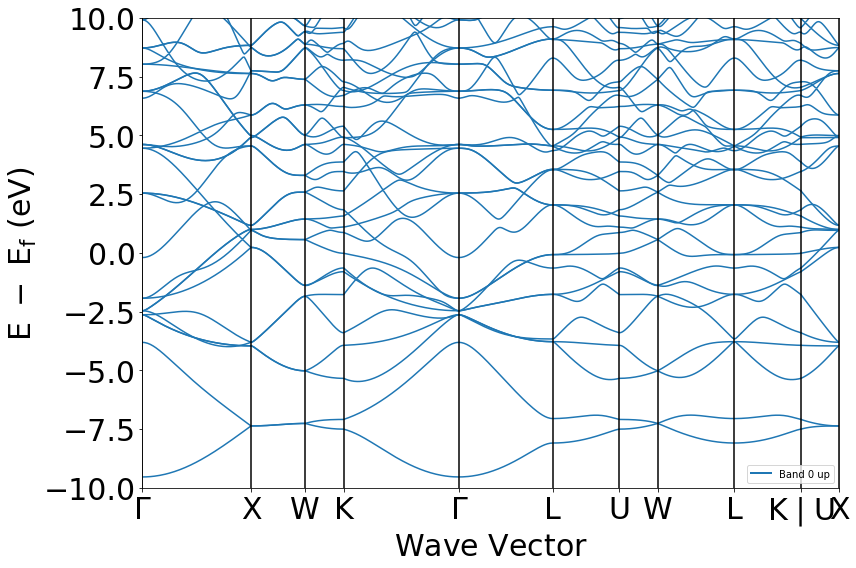

In [18]:
with MPRester() as mpr:
    bs = mpr.get_bandstructure_by_material_id("mp-1234")
    
plot_bandstructure(bs)

In [21]:
with MPRester() as mpr:
    SiO = mpr.get_materials_ids("Si-O")

In [22]:
print(SiO)

['mp-1058623', 'mp-1009490', 'mp-1023923', 'mp-1056831', 'mp-1102442', 'mp-1065697', 'mp-1180008', 'mp-1180050', 'mp-1066100', 'mp-1057818', 'mp-12957', 'mp-1091399', 'mp-611836', 'mp-607540', 'mp-1056059', 'mp-560602', 'mp-1180036', 'mp-1180064', 'mp-610917', 'mp-1087546', 'mp-32881', 'mp-10948', 'mp-553881', 'mp-557465', 'mp-558891', 'mp-561488', 'mp-557017', 'mp-561291', 'mp-556961', 'mp-600072', 'mp-1179195', 'mp-554755', 'mp-556044', 'mp-559313', 'mp-1204026', 'mp-600014', 'mp-556662', 'mp-559740', 'mp-555235', 'mp-556812', 'mp-639705', 'mp-556985', 'mp-639682', 'mp-553993', 'mp-667373', 'mp-1071820', 'mp-8059', 'mp-1173536', 'mp-600057', 'mp-555355', 'mp-1199711', 'mp-555544', 'mp-559360', 'mp-556564', 'mp-556963', 'mp-600027', 'mp-556654', 'mp-6922', 'mp-600067', 'mp-639724', 'mp-545488', 'mp-560155', 'mp-557723', 'mp-558564', 'mp-559389', 'mp-556464', 'mp-600083', 'mp-557244', 'mp-559347', 'mp-556454', 'mp-556882', 'mp-555556', 'mp-639733', 'mp-639741', 'mp-1249332', 'mp-600055

In [26]:
with MPRester() as mpr:
    structure = mpr.get_structure_by_material_id("mp-24932")
    substrates = mpr.get_substrates("mp-24932")
    for s in substrates:
        print(s)

{'sub_form': 'AlN', 'sub_id': 'mp-661', 'film_orient': '0 0 1', 'energy': 7.84746531700706e-07, 'area': 110.0791993699318, 'film_id': 'mp-24932', 'orient': '0 0 1'}
{'sub_form': 'LaAlO3', 'sub_id': 'mp-2920', 'film_orient': '0 0 1', 'energy': 1.94096000691302e-06, 'area': 330.23759810979544, 'film_id': 'mp-24932', 'orient': '0 0 1'}
{'sub_form': 'LiGaO2', 'sub_id': 'mp-5854', 'film_orient': '0 0 1', 'energy': 3.3070679793133027e-06, 'area': 192.6385988973807, 'film_id': 'mp-24932', 'orient': '1 1 0'}
{'sub_form': 'WS2', 'sub_id': 'mp-224', 'film_orient': '0 0 1', 'energy': 7.259185133779839e-06, 'area': 247.6781985823466, 'film_id': 'mp-24932', 'orient': '0 0 1'}
{'sub_form': 'MoS2', 'sub_id': 'mp-1434', 'film_orient': '0 0 1', 'energy': 7.503187879574535e-06, 'area': 247.6781985823466, 'film_id': 'mp-24932', 'orient': '0 0 1'}
{'sub_form': 'C', 'sub_id': 'mp-66', 'film_orient': '1 0 0', 'energy': 7.703154077073864e-06, 'area': 318.31661438071535, 'film_id': 'mp-24932', 'orient': '1 0 

In [28]:
with MPRester() as mpr:
    SiO2_compounds = mpr.query({"pretty_formula":"SiO2"}, ["material_id", "structure"])
    for s in SiO2_compounds:
        print(s)

{'material_id': 'mp-10948', 'structure': Structure Summary
Lattice
    abc : 4.114123 4.527163 5.081248
 angles : 90.0 90.0 90.0
 volume : 94.6397959302569
      A : 4.114123 0.0 0.0
      B : 0.0 4.527163 0.0
      C : 0.0 0.0 5.081248
PeriodicSite: Si (2.0571, 3.3954, 3.3146) [0.5000, 0.7500, 0.6523]
PeriodicSite: Si (0.0000, 1.1318, 4.3073) [0.0000, 0.2500, 0.8477]
PeriodicSite: Si (2.0571, 1.1318, 1.7667) [0.5000, 0.2500, 0.3477]
PeriodicSite: Si (0.0000, 3.3954, 0.7739) [0.0000, 0.7500, 0.1523]
PeriodicSite: O (1.1071, 2.6256, 1.9432) [0.2691, 0.5800, 0.3824]
PeriodicSite: O (3.1642, 1.9015, 0.5974) [0.7691, 0.4200, 0.1176]
PeriodicSite: O (0.9499, 0.3620, 0.5974) [0.2309, 0.0800, 0.1176]
PeriodicSite: O (3.0070, 4.1651, 1.9432) [0.7309, 0.9200, 0.3824]
PeriodicSite: O (1.1071, 0.3620, 3.1381) [0.2691, 0.0800, 0.6176]
PeriodicSite: O (3.1642, 4.1651, 4.4838) [0.7691, 0.9200, 0.8824]
PeriodicSite: O (0.9499, 2.6256, 4.4838) [0.2309, 0.5800, 0.8824]
PeriodicSite: O (3.0070, 1.9015, 

In [29]:
SiO2_compounds[0]

{'material_id': 'mp-10948',
 'structure': Structure Summary
 Lattice
     abc : 4.114123 4.527163 5.081248
  angles : 90.0 90.0 90.0
  volume : 94.6397959302569
       A : 4.114123 0.0 0.0
       B : 0.0 4.527163 0.0
       C : 0.0 0.0 5.081248
 PeriodicSite: Si (2.0571, 3.3954, 3.3146) [0.5000, 0.7500, 0.6523]
 PeriodicSite: Si (0.0000, 1.1318, 4.3073) [0.0000, 0.2500, 0.8477]
 PeriodicSite: Si (2.0571, 1.1318, 1.7667) [0.5000, 0.2500, 0.3477]
 PeriodicSite: Si (0.0000, 3.3954, 0.7739) [0.0000, 0.7500, 0.1523]
 PeriodicSite: O (1.1071, 2.6256, 1.9432) [0.2691, 0.5800, 0.3824]
 PeriodicSite: O (3.1642, 1.9015, 0.5974) [0.7691, 0.4200, 0.1176]
 PeriodicSite: O (0.9499, 0.3620, 0.5974) [0.2309, 0.0800, 0.1176]
 PeriodicSite: O (3.0070, 4.1651, 1.9432) [0.7309, 0.9200, 0.3824]
 PeriodicSite: O (1.1071, 0.3620, 3.1381) [0.2691, 0.0800, 0.6176]
 PeriodicSite: O (3.1642, 4.1651, 4.4838) [0.7691, 0.9200, 0.8824]
 PeriodicSite: O (0.9499, 2.6256, 4.4838) [0.2309, 0.5800, 0.8824]
 PeriodicSite:

In [30]:
with MPRester() as mpr:
    SiO2_compounds = mpr.query("SiO2", ["material_id"])
    print(len(SiO2_compounds))

317


In [44]:
with MPRester("WESqkrhIzuQO30MN") as mpr:
    SiO2_entries = mpr.query("SiO2", ["spacegroup"])

In [46]:
crystal_systems = []
for entry in SiO2_entries:
    crystal_systems.append(entry["spacegroup"] ["crystal_system"])

In [49]:
count_dict = {}
for system in crystal_systems:
    if system in count_dict:
        count_dict[system] += 1
    else:
        count_dict[system] = 1

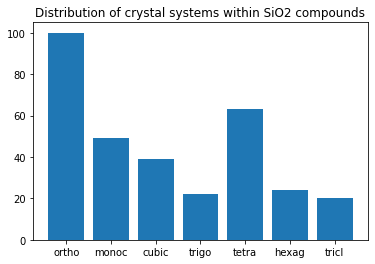

In [50]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.bar(range(len(count_dict)), count_dict.values(), align='center')
plt.xticks(range(len(count_dict)), [key[0:5] for key in list(count_dict.keys())])
plt.title('Distribution of crystal systems within SiO2 compounds')
plt.show()

In [71]:
import warnings
warnings.filterwarnings('ignore')

def shortlist(long_list, n=5):
    print("First {} of {} items:".format(min(n, 5), len(long_list)))
    for item in long_list[0:n]:
        print(item)

In [72]:
alkali_metals = ["Li", "Na", "K", "Rb", "Cs"]
criteria = {"elements":{"$in":alkali_metals, "$all": ["N"]}, "nelements": 2}
properties=["materials_id", "pretty_formula"]
with MPRester() as mpr:
    shortlist(mpr.query("{Li,Na,K,Rb,Cs}-N", ["pretty_formula"]))

First 5 of 46 items:
{'pretty_formula': 'CsN2'}
{'pretty_formula': 'CsN3'}
{'pretty_formula': 'CsN'}
{'pretty_formula': 'CsN3'}
{'pretty_formula': 'KN'}


In [73]:
with MPRester("WESqkrhIzuQO30MN") as mpr:
    ac = mpr.query({"spacegroup.number": 92, "pretty_formula": "SiO2", "e_above_hull": {"$lt": 0.1}},
                  ["material_id", "structure"])[0]

In [74]:
ac_structure = ac["structure"]

In [75]:
from pymatgen.analysis.structure_matcher import StructureMatcher
from pymatgen.analysis.structure_matcher import FrameworkComparator
comparison_engine = StructureMatcher(ltol=.2, stol=.5, angle_tol=10, primitive_cell=True, 
                                     scale=True, attempt_supercell=True,
                                     comparator=FrameworkComparator())

In [76]:
print(comparison_engine.fit(ac_structure, ac_structure))

True


In [77]:
with MPRester("WESqkrhIzuQO30MN") as mpr:
    bc_structure = mpr.get_structure_by_material_id("mp-546794")
print(comparison_engine.fit(bc_structure, ac_structure))

True


In [83]:
with MPRester("WESqkrhIzuQO30MN") as mpr:
    bc_structure = mpr.get_structure_by_material_id("mp-4991")
print(comparison_engine.fit(bc_structure, ac_structure))

False


In [86]:
with MPRester("WESqkrhIzuQO30MN") as mpr:
    vanadate_ids = [entry["material_id"] for entry in mpr.query('*V308', ["material_id"])]
    vanadates = mpr.query({"material_id": {"$in": vanadate_ids},
                          "e_above_hull": {"$lt": 0.1},
                          "nsites":{"$lt": 50}}, ["material_id", "structure"])

In [87]:
matches = []
for v in vanadates:
    if comparison_engine.fit(ac_structure, v["structure"]):
        matches.append(v["material_id"])
        
with MPRester("WESqkrhIzuQO30MN") as mpr:
    elastic_data = mpr.query({"material_id": {"$in": matches}}, ['material_id', 'pretty_formula', 'elasticity.homogeneous_poisson'])

for e in elastic_data:
    print(e)